![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## The Numbers Dataset

In [3]:
# Reading the csv file and coverting the release_date column to datetime

df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', 
                    parse_dates=['release_date'])
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
df_tn.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [5]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [6]:
df_tn.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


## Dropping irrelevant columns

In [7]:
# Creating a list of the columns to drop
cols_to_drop = ['id', 'domestic_gross']

df_tn = df_tn.drop(columns=cols_to_drop)


In [8]:
# Converting relevant columns to integers
for column in ['production_budget', 'worldwide_gross']:
    # Convert to string, replace '$' and ',' with '', then convert to numeric
    df_tn[column] = pd.to_numeric(
        df_tn[column].astype(str).replace({'\$': '', ',': ''}, regex=True),
        errors='coerce'  # Replace invalid parsing with NaN
    )

# Verify the changes
df_tn.head()


,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


In [9]:
df_tn['worldwide_gross'].describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

## Dropping rows 


In [10]:
#Dropping the rows in world_wide columns that contain the value 0
df_tn_zero = df_tn[df_tn['worldwide_gross'] == 0]
df_tn_zero

,release_date,movie,production_budget,worldwide_gross
194,2020-12-31,Moonfall,150000000,0
479,2017-12-13,Bright,90000000,0
480,2019-12-31,Army of the Dead,90000000,0
535,2020-02-21,Call of the Wild,82000000,0
670,2019-08-30,PLAYMOBIL,75000000,0
...,...,...,...,...
5761,2014-12-31,Stories of Our Lives,15000,0
5764,2007-12-31,Tin Can Man,12000,0
5771,2015-05-19,Family Motocross,10000,0
5777,2018-12-31,Red 11,7000,0


In [11]:
# Drop rows where 'worldwide_gross' equals 0
df_tn_clean = df_tn[df_tn['worldwide_gross'] != 0]

# Verify the changes
df_tn_clean['worldwide_gross'].describe()


count    5.415000e+03
mean     9.768800e+07
std      1.788591e+08
min      2.600000e+01
25%      7.004834e+06
50%      3.333987e+07
75%      1.044590e+08
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [12]:
df_tn_26 = df_tn[df_tn['worldwide_gross'] == 26]
df_tn_26

,release_date,movie,production_budget,worldwide_gross
5302,2015-12-11,American Hero,1000000,26


In [13]:
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
0,2009-12-18,Avatar,425000000,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,2019-06-07,Dark Phoenix,350000000,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
5775,2006-05-26,Cavite,7000,71644
5776,2004-12-31,The Mongol King,7000,900
5778,1999-04-02,Following,6000,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338


In [14]:
# Plotting to show the release years over the time period
df_tn_clean['release_date'].describe(datetime_is_numeric=True)

count                             5415
mean     2004-02-20 12:26:11.634349056
min                1915-02-08 00:00:00
25%                1999-12-13 12:00:00
50%                2006-08-11 00:00:00
75%                2012-05-18 00:00:00
max                2019-06-21 00:00:00
Name: release_date, dtype: object

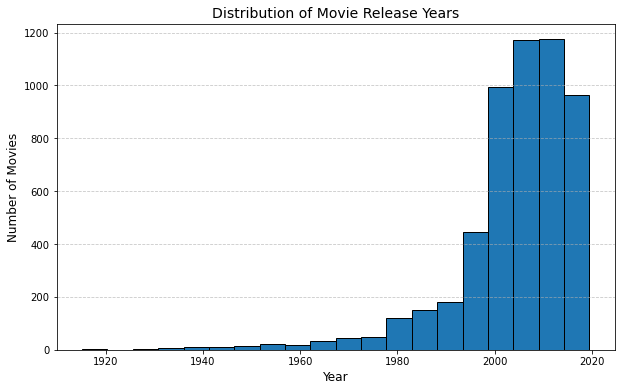

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_tn_clean['release_date'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Release Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
# Filtering the data to only include movies from the year 2000 onward

df_tn_clean = df_tn_clean[df_tn_clean['release_date'] > pd.Timestamp(2000, 1, 1)]

# Verify the changes
df_tn_clean['release_date'].describe(datetime_is_numeric=True) # Check the new data frame



count                             4045
mean     2009-07-22 02:42:41.384425472
min                2000-01-12 00:00:00
25%                2005-03-18 00:00:00
50%                2009-08-21 00:00:00
75%                2013-12-25 00:00:00
max                2019-06-21 00:00:00
Name: release_date, dtype: object

## Creating new columns that measure financial success

### Profit 
- **Formula**: Profit = Worldwide Gross − Production Budget
- It measures the actual monetary gain after covering the production costs and is a direct indicator of how much profit a movie made, which is crucial for understanding its financial success.
  


In [26]:
df_tn_clean = df_tn_clean.copy()
df_tn_clean['profit'] = df_tn_clean['worldwide_gross'] - df_tn_clean['production_budget']
df_tn_clean

,release_date,movie,production_budget,worldwide_gross,profit
0,2009-12-18,Avatar,425000000,2776345279,2351345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747
...,...,...,...,...,...
5774,2004-10-08,Primer,7000,841926,834926
5775,2006-05-26,Cavite,7000,71644,64644
5776,2004-12-31,The Mongol King,7000,900,-6100
5779,2005-07-13,Return to the Land of Wonders,5000,1338,-3662


## Return on Investment (ROI)

- ROI = (profit - cost)/cost * 100%
- It measures the profitability of investing in a movie relative to its cost.

In [30]:
df_tn_clean['ROI'] = df_tn_clean['profit']/df_tn_clean['production_budget']*100

df_tn_clean

,release_date,movie,production_budget,worldwide_gross,profit,ROI
0,2009-12-18,Avatar,425000000,2776345279,2351345279,553.257713
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,635063875,154.667286
2,2019-06-07,Dark Phoenix,350000000,149762350,-200237650,-57.210757
3,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1072413963,324.384139
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,999721747,315.369636
...,...,...,...,...,...,...
5774,2004-10-08,Primer,7000,841926,834926,11927.514286
5775,2006-05-26,Cavite,7000,71644,64644,923.485714
5776,2004-12-31,The Mongol King,7000,900,-6100,-87.142857
5779,2005-07-13,Return to the Land of Wonders,5000,1338,-3662,-73.240000


## The Movie DB

In [17]:
# Reading the csv file
df_db = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, 
                      parse_dates=['release_date'])
df_db

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [18]:
df_db.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [19]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [20]:
df_db.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [21]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [22]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***